In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Download the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features (X) and labels (y)
X, y = mnist.data, mnist.target

X = X / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', gamma='scale', C=1.0, random_state=42)

# Train the SVM model
svm_clf.fit(X_train, y_train)


/Users/pranav/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


SVC(kernel='linear', random_state=42)

Accuracy: 0.9351428571428572


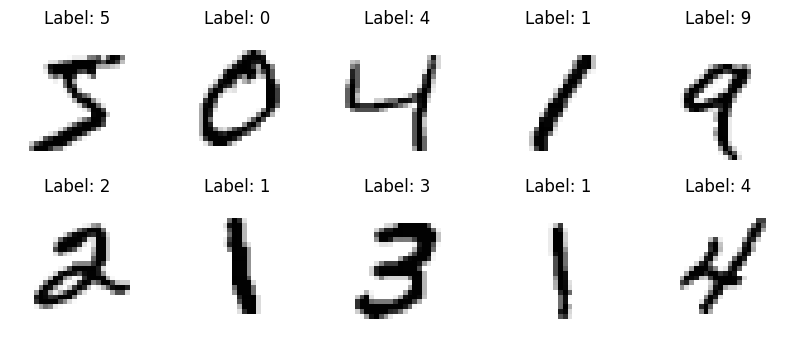

In [5]:
# Evaluate the trained model
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

X = np.array(X)
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    plt.title('Label: ' + str(y[i]))
    plt.axis('off')
plt.show()